<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入数据" data-toc-modified-id="导入数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#建立关系矩阵rating" data-toc-modified-id="建立关系矩阵rating-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>建立关系矩阵rating</a></span></li><li><span><a href="#将数据中的空值填充为0" data-toc-modified-id="将数据中的空值填充为0-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>将数据中的空值填充为0</a></span><ul class="toc-item"><li><span><a href="#常用相似性计算方式" data-toc-modified-id="常用相似性计算方式-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>常用相似性计算方式</a></span></li></ul></li><li><span><a href="#使用余弦相似度计算用户相似度矩阵" data-toc-modified-id="使用余弦相似度计算用户相似度矩阵-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>使用余弦相似度计算用户相似度矩阵</a></span></li><li><span><a href="#构建推荐指数函数" data-toc-modified-id="构建推荐指数函数-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>构建推荐指数函数</a></span></li><li><span><a href="#构建预测函数（推荐）" data-toc-modified-id="构建预测函数（推荐）-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>构建预测函数（推荐）</a></span></li><li><span><a href="#评价模型性能（预测）" data-toc-modified-id="评价模型性能（预测）-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>评价模型性能（预测）</a></span></li><li><span><a href="#构建预测函数（推荐）" data-toc-modified-id="构建预测函数（推荐）-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>构建预测函数（推荐）</a></span></li><li><span><a href="#构建最终的推荐函数" data-toc-modified-id="构建最终的推荐函数-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>构建最终的推荐函数</a></span></li><li><span><a href="#将推荐指数计算修改为添加平均值的" data-toc-modified-id="将推荐指数计算修改为添加平均值的-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>将推荐指数计算修改为添加平均值的</a></span><ul class="toc-item"><li><span><a href="#top-n-推荐" data-toc-modified-id="top-n-推荐-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>top n 推荐</a></span></li><li><span><a href="#做预测" data-toc-modified-id="做预测-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>做预测</a></span></li><li><span><a href="#对k进行优化" data-toc-modified-id="对k进行优化-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>对k进行优化</a></span></li></ul></li></ul></div>

## 导入数据

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("example.txt",header=None)
df.columns=['用户id','物品id','喜好程度']

In [3]:
df.head()

,用户id,物品id,喜好程度
0,0,1,5
1,0,2,4
2,0,3,3
3,0,4,5
4,1,1,4


In [4]:
df.shape

(22, 3)

## 建立关系矩阵rating

In [5]:
dfpivot= df.pivot(index="用户id",columns="物品id",values="喜好程度") #轴向旋转
dfpivot

物品id,0,1,2,3,4,5
用户id,,,,,,
0,NaN,5.0,4.0,3.0,5.0,NaN
1,NaN,4.0,3.0,NaN,NaN,5.0
2,NaN,5.0,NaN,4.0,NaN,4.0
3,NaN,4.0,NaN,5.0,3.0,4.0
4,5.0,3.0,3.0,3.0,NaN,NaN
5,4.0,NaN,4.0,5.0,NaN,4.0


## 将数据中的空值填充为0

In [6]:
freq= dfpivot.fillna(0)
freq

物品id,0,1,2,3,4,5
用户id,,,,,,
0,0.0,5.0,4.0,3.0,5.0,0.0
1,0.0,4.0,3.0,0.0,0.0,5.0
2,0.0,5.0,0.0,4.0,0.0,4.0
3,0.0,4.0,0.0,5.0,3.0,4.0
4,5.0,3.0,3.0,3.0,0.0,0.0
5,4.0,0.0,4.0,5.0,0.0,4.0


In [7]:
freq_matrix = freq.values #取出值
freq_matrix

array([[0., 5., 4., 3., 5., 0.],
       [0., 4., 3., 0., 0., 5.],
       [0., 5., 0., 4., 0., 4.],
       [0., 4., 0., 5., 3., 4.],
       [5., 3., 3., 3., 0., 0.],
       [4., 0., 4., 5., 0., 4.]])

### 常用相似性计算方式

In [8]:
# 曼哈顿相似性
def manhattan(user_id1, user_id2):
    value = 1/(sum(abs(user_id1-user_id2))+1)
    return value
manhattan(freq_matrix[0,:], freq_matrix[1,:]) #0,1两个用户

0.0625

In [7]:
# 欧式距离相似性
def euclidean(user_id1, user_id2):
    value = 1/(sum((user_id1-user_id2)**2)**0.5+1)
    return value
euclidean(freq_matrix[0,:], freq_matrix[1,:]) #0,1两个用户

0.11350416126511091

In [8]:
# 余弦相似度
def cosine(user_id1, user_id2):
    x, y = user_id1, user_id2
    # 分母
    denominator = (sum(x*x)*sum(y*y))**0.5
    try:                                          #异常处理，提高程序健壮性；常用场景：1.文件读写 2.爬虫
        value = sum(x*y)/denominator
    except ZeroDivisionError:
        value = 0
    return value     
cosine(freq_matrix[0,:], freq_matrix[1,:]) 

0.5225578117937446

In [9]:
# 皮尔逊相关系数
def pearson(user_id1, user_id2):
    x, y = user_id1, user_id2
    mean1, mean2 = x.mean(), y.mean()
    # 分母
    denominator = (sum((x-mean1)**2)*sum((y-mean2)**2))**0.5
    try:
        value = sum((x - mean1) * (y - mean2)) / denominator
    except ZeroDivisionError:
        value = 0
    return value
pearson(freq_matrix[0,:], freq_matrix[1,:]) 

-0.07571919860738668

## 使用余弦相似度计算用户相似度矩阵

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
user_similar=cosine_similarity(freq_matrix)
user_similar

array([[1.        , 0.52255781, 0.56589214, 0.71066905, 0.57646135,
        0.41895717],
       [0.52255781, 1.        , 0.74926865, 0.62667956, 0.41184388,
        0.52966777],
       [0.56589214, 0.74926865, 1.        , 0.91301651, 0.49593489,
        0.55808923],
       [0.71066905, 0.62667956, 0.91301651, 1.        , 0.4608824 ,
        0.59067754],
       [0.57646135, 0.41184388, 0.49593489, 0.4608824 , 1.        ,
        0.76284228],
       [0.41895717, 0.52966777, 0.55808923, 0.59067754, 0.76284228,
        1.        ]])

In [11]:
pd.DataFrame(user_similar)

,0,1,2,3,4,5
0,1.000000,0.522558,0.565892,0.710669,0.576461,0.418957
1,0.522558,1.000000,0.749269,0.626680,0.411844,0.529668
2,0.565892,0.749269,1.000000,0.913017,0.495935,0.558089
3,0.710669,0.626680,0.913017,1.000000,0.460882,0.590678
4,0.576461,0.411844,0.495935,0.460882,1.000000,0.762842
5,0.418957,0.529668,0.558089,0.590678,0.762842,1.000000


## 构建推荐指数函数

In [12]:
#构建一个基于用户的推荐
# 第item_id个物品对第user_id个用户的推荐分值
def Recommendation(user_id,item_id,similar,k=10):  #2,2,user_similar, 2
    """不减平均数的计算方法"""
    score = 0
    weight = 0
    item_id_action = freq_matrix[:,item_id]      #物品item_id 得到的所有用户评分  
    user_id_similar = similar[user_id,:]          #用户user_id 对所有用户的相似度    
    similar_index = np.argsort(user_id_similar)[-(k+1):-1]  #最相似的k个用户的index（除了自己）
    
    for j in similar_index :   #1,3
        if item_id_action[j]!=0:             #表示相似的那个用户对该物品评分过
            score += user_id_similar[j]*(item_id_action[j])
            weight += abs(user_id_similar[j])

    if weight==0:  
        return 0
    else:
        return score/float(weight)

In [13]:
Recommendation(2,2,user_similar, 2) #预测的第二个用户对第二个物品的喜欢程度

3.0

## 构建预测函数（推荐）

In [14]:
user_count = freq_matrix.shape[0]#用户数
item_count = freq_matrix.shape[1]#物品数

In [17]:
predic_matrix = np.zeros((user_count,item_count)) #新建全为0的预测评分矩阵

In [18]:
for user_id in range(user_count):       #对所有用户
    for item_id in range(item_count):   #对所有物品
        if freq_matrix[user_id,item_id] == 0:#表示该用户没有用过该物品
            predic_matrix[user_id,item_id] = Recommendation(user_id,item_id,user_similar,k=10)  #最相似的10个用户

In [19]:
pd.DataFrame(predic_matrix)

,0,1,2,3,4,5
0,4.579115,0.00000,0.000000,0.000000,0.000000,4.235591
1,4.437428,0.00000,0.000000,4.078149,3.909399,0.000000
2,4.470516,0.00000,3.474417,0.000000,3.765283,0.000000
3,4.438284,0.00000,3.544745,0.000000,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.000000,4.111418,4.193218
5,0.000000,4.07489,0.000000,0.000000,3.829918,0.000000


## 评价模型性能（预测）

In [20]:
predic_matrix1 = np.zeros((user_count,item_count))
for user_id in range(user_count):
    for item_id in range(item_count):
        if freq_matrix[user_id,item_id] != 0:   #表示该用户用过该物品
            predic_matrix1[user_id,item_id] = Recommendation(user_id,item_id,user_similar,k=10)

In [21]:
pd.DataFrame(predic_matrix1)  #预测分

,0,1,2,3,4,5
0,0.0,3.995551,3.275997,4.243473,3.0,0.000000
1,0.0,4.372230,3.718699,0.000000,0.0,4.000000
2,0.0,4.025681,0.000000,4.161583,0.0,4.337451
3,0.0,4.428881,0.000000,3.782871,5.0,4.294164
4,4.0,4.551326,3.764815,4.281894,0.0,0.000000
5,5.0,0.000000,3.244794,3.746361,0.0,4.315572


In [20]:
freq_matrix  #实际分

array([[0., 5., 4., 3., 5., 0.],
       [0., 4., 3., 0., 0., 5.],
       [0., 5., 0., 4., 0., 4.],
       [0., 4., 0., 5., 3., 4.],
       [5., 3., 3., 3., 0., 0.],
       [4., 0., 4., 5., 0., 4.]])

In [21]:
(((predic_matrix1- freq_matrix)**2).mean())**0.5 #RMSE

0.8241477157805165

## 构建预测函数（推荐）

In [22]:
#构建预测函数
def predict(user_similar):
    """预测函数的功能: 传入相似度矩阵, 通过对每个用户和每个物品进行计算, 计算出一个推荐矩阵"""
    user_count = freq_matrix.shape[0]#用户数
    item_count = freq_matrix.shape[1]#商品数
    predic_matrix = np.zeros((user_count,item_count))
    for user_id in range(user_count):
        for item_id in range(item_count):
            if freq_matrix[user_id,item_id] == 0:  #没有用过该物品
                predic_matrix[user_id,item_id] = Recommendation(user_id,item_id,user_similar)
    return predic_matrix

In [23]:
user_prediction_matrix = predict(user_similar)
user_prediction_matrix

array([[4.57911455, 0.        , 0.        , 0.        , 0.        ,
        4.23559056],
       [4.43742834, 0.        , 0.        , 4.07814938, 3.90939927,
        0.        ],
       [4.47051569, 0.        , 3.4744169 , 0.        , 3.76528343,
        0.        ],
       [4.43828448, 0.        , 3.54474525, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 4.11141818,
        4.19321755],
       [0.        , 4.07489042, 0.        , 0.        , 3.82991832,
        0.        ]])

## 构建最终的推荐函数

In [24]:
recommendation_df = pd.DataFrame(user_prediction_matrix,columns=freq.columns,index=freq.index)

In [25]:
recommendation_df

物品id,0,1,2,3,4,5
用户id,,,,,,
0,4.579115,0.00000,0.000000,0.000000,0.000000,4.235591
1,4.437428,0.00000,0.000000,4.078149,3.909399,0.000000
2,4.470516,0.00000,3.474417,0.000000,3.765283,0.000000
3,4.438284,0.00000,3.544745,0.000000,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.000000,4.111418,4.193218
5,0.000000,4.07489,0.000000,0.000000,3.829918,0.000000


In [27]:
recommendation_df_2 = recommendation_df.stack().reset_index()
recommendation_df_2

,用户id,物品id,0
0,0,0,4.579115
1,0,1,0.000000
2,0,2,0.000000
3,0,3,0.000000
4,0,4,0.000000
5,0,5,4.235591
6,1,0,4.437428
7,1,1,0.000000
8,1,2,0.000000
9,1,3,4.078149


In [28]:
recommendation_df_2.rename(columns={0:"推荐指数"},inplace=True)

In [29]:
recommendation_df_2

,用户id,物品id,推荐指数
0,0,0,4.579115
1,0,1,0.000000
2,0,2,0.000000
3,0,3,0.000000
4,0,4,0.000000
5,0,5,4.235591
6,1,0,4.437428
7,1,1,0.000000
8,1,2,0.000000
9,1,3,4.078149


In [30]:
recommendation_df_grouped = recommendation_df_2.groupby("用户id")
recommendation_df_grouped

自定义一个排序函数,排序后返回每组中的前两个数据

In [31]:
def get_topk(group,n):
    return group.sort_values("推荐指数",ascending=False)[:n]  #表示给这个用户推荐n个，top N推荐

In [32]:
topk = recommendation_df_grouped.apply(get_topk,n=2)  #top 2推荐

In [33]:
topk

用户id  物品id      推荐指数
用户id                         
0    0      0     0  4.579115
     5      0     5  4.235591
1    6      1     0  4.437428
     9      1     3  4.078149
2    12     2     0  4.470516
     16     2     4  3.765283
3    18     3     0  4.438284
     20     3     2  3.544745
4    29     4     5  4.193218
     28     4     4  4.111418
5    31     5     1  4.074890
     34     5     4  3.829918

In [34]:
top_n=topk[['用户id','物品id','推荐指数']].reset_index(drop=True)
top_n

,用户id,物品id,推荐指数
0,0,0,4.579115
1,0,5,4.235591
2,1,0,4.437428
3,1,3,4.078149
4,2,0,4.470516
5,2,4,3.765283
6,3,0,4.438284
7,3,2,3.544745
8,4,5,4.193218
9,4,4,4.111418


In [34]:
pd.DataFrame.reset_index?

# 基于用户的推荐，没有减去平均值，完整代码

In [35]:
#导入相关库
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 构建推荐指数函数，第item_id个物品对第user_id个用户的推荐分值，看最相似的k个用户
def Recommendation(user_id,item_id,similar,k=10):  #2,2,user_similar, 2
    """不减平均数的计算方法"""
    score = 0
    weight = 0
    user_id_action = freq_matrix[user_id,:]      #用户user_id 对所有商品的行为评分  
    item_id_action = freq_matrix[:,item_id]      #物品item_id 得到的所有用户评分  
    user_id_similar = similar[user_id,:]      #用户user_id 对所有用户的相似度    
    similar_index = np.argsort(user_id_similar)[-(k+1):-1]  #0,3 #最相似的k个用户的index（除了自己）
    for j in similar_index :  
        if item_id_action[j]!=0:  #表示相似的那个用户对该物品评分过
            score += user_id_similar[j]*(item_id_action[j])
            weight += abs(user_id_similar[j])
    if weight==0:  
        return 0
    else:
        return score/float(weight)

#构建预测函数，得到预测分数矩阵
def predict(user_similar):
    """预测函数的功能: 传入相似度矩阵, 通过对每个用户和每个物品进行计算, 计算出一个推荐矩阵"""
    user_count = freq_matrix.shape[0]#用户数
    item_count = freq_matrix.shape[1]#商品数
    predic_matrix = np.zeros((user_count,item_count))
    for user_id in range(user_count):
        for item_id in range(item_count):
            if freq_matrix[user_id,item_id] == 0:
                #print (user_id,item_id)
                predic_matrix[user_id,item_id] = Recommendation(user_id,item_id,user_similar)
    return predic_matrix

def get_topk(group,n):
    return group.sort_values("推荐指数",ascending=False)[:n]

#读取数据
df = pd.read_csv("example.txt",header=None)
df.columns=['用户id','物品id','喜好程度']

#建立关系矩阵
dfpivot= df.pivot(index="用户id",columns="物品id",values="喜好程度")

#填充0
freq= dfpivot.fillna(0)

#取出值，得到评分数组
freq_matrix = freq.values

#计算相似性矩阵
user_similar=cosine_similarity(freq_matrix)

#得到预测分数矩阵
user_prediction_matrix = predict(user_similar)

#得到预测分数的dataframe
recommendation_df = pd.DataFrame(user_prediction_matrix,columns=freq.columns,index=freq.index)

recommendation_df_2 = recommendation_df.stack().reset_index()
recommendation_df_2.rename(columns={0:"推荐指数"},inplace=True)

recommendation_df_grouped = recommendation_df_2.groupby("用户id")

#获得top n推荐
topk = recommendation_df_grouped.apply(get_topk,n=3) #推荐几个

top_n=topk[['用户id','物品id','推荐指数']].reset_index(drop=True)
top_n

,用户id,物品id,推荐指数
0,0,0,4.579115
1,0,5,4.235591
2,0,1,0.000000
3,1,0,4.437428
4,1,3,4.078149
5,1,4,3.909399
6,2,0,4.470516
7,2,4,3.765283
8,2,2,3.474417
9,3,0,4.438284


## 将推荐指数计算修改为添加平均值的

In [81]:
#构建一个基于用户和物品的推荐
def Recommendation_mean(user_id,item_id,similar,k=10):  #2,2,k=2
    """减去平均数的计算方法"""
    score = 0
    weight = 0
    user_id_action = freq_matrix[user_id,:]      #用户user_id 对所有商品的行为评分  
    user_id_i_mean = np.sum(user_id_action)/user_id_action[user_id_action!=0].size# 表示用户用户对所有商品的平均分
    
    item_id_action = freq_matrix[:,item_id]      #物品item_id 得到的所有用户评分  
    user_id_similar = similar[user_id,:]        #用户user_id 对所有用户的相似度    
    similar_index = np.argsort(user_id_similar)[-(k+1):-1]  #最相似的k个用户的index（除了自己）
   
    for j in similar_index : 
        if item_id_action[j]!=0: 
            user_id_j_action = freq_matrix[j,:]  #表示相似的那个用户对所有物品的评分
            #表示相似的那个用户对所有物品的平均分
            user_id_j_mean = np.sum(user_id_j_action)/user_id_j_action[user_id_j_action!=0].size
            score += user_id_similar[j]*(item_id_action[j]-user_id_j_mean)
            weight += abs(user_id_similar[j])
    if weight==0:  
        return 0
    else:
        return user_id_i_mean + score/float(weight)

In [82]:
Recommendation_mean(2,2,user_similar,k=2)

3.333333333333333

In [83]:
#构建预测函数
def predict_mean(user_similar):
    """预测函数的功能: 传入相似度矩阵, 通过对每个用户和每个物品进行计算, 计算出一个推荐矩阵"""
    user_count = freq_matrix.shape[0]#用户数
    item_count = freq_matrix.shape[1]#商品数
    predic_matrix = np.zeros((user_count,item_count))
    for user_id in range(user_count):
        for item_id in range(item_count):
            if freq_matrix[user_id,item_id] == 0:
                predic_matrix[user_id,item_id] = Recommendation_mean(user_id,item_id,user_similar)
    return predic_matrix

# 基于用户的推荐，减去平均值，完整代码

### top n 推荐

In [84]:
#导入相关库
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 构建推荐指数函数，第item_id个物品对第user_id个用户的推荐分值，看最相似的k个用户
def Recommendation_mean(user_id,item_id,similar,k=10):
    """减去平均数的计算方法"""
    score = 0
    weight = 0
    user_id_action = freq_matrix[user_id,:]      #用户user_id 对所有商品的行为评分  
    item_id_action = freq_matrix[:,item_id]      #物品item_id 得到的所有用户评分  
    user_id_similar = similar[user_id,:]      #用户user_id 对所有用户的相似度    
    similar_index = np.argsort(user_id_similar)[-(k+1):-1]  #最相似的k个用户的index（除了自己）
    user_id_i_mean = np.sum(user_id_action)/user_id_action[user_id_action!=0].size#
    for j in similar_index : #0,3
        if item_id_action[j]!=0: 
            user_id_j_action = freq_matrix[j,:]
            user_id_j_mean = np.sum(user_id_j_action)/user_id_j_action[user_id_j_action!=0].size
            score += user_id_similar[j]*(item_id_action[j]-user_id_j_mean)
            weight += abs(user_id_similar[j])
    if weight==0:  
        return 0
    else:
        return user_id_i_mean + score/float(weight)
    
#构建预测函数
def predict_mean(user_similar):
    """预测函数的功能: 传入相似度矩阵, 通过对每个用户和每个物品进行计算, 计算出一个推荐矩阵"""
    user_count = freq_matrix.shape[0]#用户数
    item_count = freq_matrix.shape[1]#商品数
    predic_matrix = np.zeros((user_count,item_count))
    for user_id in range(user_count):
        for item_id in range(item_count):
            if freq_matrix[user_id,item_id] == 0:  #表示该用户没有用户该物品
                predic_matrix[user_id,item_id] = Recommendation_mean(user_id,item_id,user_similar)
    return predic_matrix  


def get_topk(group,n):
    return group.sort_values("推荐指数",ascending=False)[:n]

#读取数据
df = pd.read_csv("example.txt",header=None)
df.columns=['用户id','物品id','喜好程度']

#建立关系矩阵
dfpivot= df.pivot(index="用户id",columns="物品id",values="喜好程度")

#填充0
freq= dfpivot.fillna(0)

#取出值，得到评分数组
freq_matrix = freq.values

#计算相似性矩阵
user_similar=cosine_similarity(freq_matrix)

#得到预测分数矩阵
user_prediction_matrix = predict_mean(user_similar)

#得到预测分数的dataframe
recommendation_df = pd.DataFrame(user_prediction_matrix,columns=freq.columns,index=freq.index)

recommendation_df_2 = recommendation_df.stack().reset_index()
recommendation_df_2.rename(columns={0:"推荐指数"},inplace=True)

recommendation_df_grouped = recommendation_df_2.groupby("用户id")

#获得top n推荐
topk = recommendation_df_grouped.apply(get_topk,n=3) #推荐几个

top_n=topk[['用户id','物品id','推荐指数']].reset_index(drop=True)
top_n

,用户id,物品id,推荐指数
0,0,0,5.013450
1,0,5,4.353327
2,0,1,0.000000
3,1,0,4.515500
4,1,3,3.970090
5,1,4,3.795724
6,2,0,4.906736
7,2,4,4.002956
8,2,2,3.793810
9,3,0,4.516998


### 做预测

In [87]:
#导入相关库
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 构建推荐指数函数，第item_id个物品对第user_id个用户的推荐分值，看最相似的k个用户
def Recommendation_mean(user_id,item_id,similar,k=10):
    """减去平均数的计算方法"""
    score = 0
    weight = 0
    user_id_action = freq_matrix[user_id,:]      #用户user_id 对所有商品的行为评分  
    item_id_action = freq_matrix[:,item_id]      #物品item_id 得到的所有用户评分  
    user_id_similar = similar[user_id,:]      #用户user_id 对所有用户的相似度    
    similar_index = np.argsort(user_id_similar)[-(k+1):-1]  #最相似的k个用户的index（除了自己）
   
    user_id_i_mean = np.sum(user_id_action)/user_id_action[user_id_action!=0].size#
    for j in similar_index : 
        if item_id_action[j]!=0: 
            user_id_j_action = freq_matrix[j,:]
            user_id_j_mean = np.sum(user_id_j_action)/user_id_j_action[user_id_j_action!=0].size
            score += user_id_similar[j]*(item_id_action[j]-user_id_j_mean)
            weight += abs(user_id_similar[j])
    if weight==0:  
        return 0
    else:
        return user_id_i_mean + score/float(weight)
    
#构建预测函数
def predict_mean(user_similar):
    """预测函数的功能: 传入相似度矩阵, 通过对每个用户和每个物品进行计算, 计算出一个推荐矩阵"""
    user_count = freq_matrix.shape[0]#用户数
    item_count = freq_matrix.shape[1]#商品数
    predic_matrix = np.zeros((user_count,item_count))
    for user_id in range(user_count):
        for item_id in range(item_count):
            if freq_matrix[user_id,item_id] != 0: #表示该用户用过该物品
                predic_matrix[user_id,item_id] = Recommendation_mean(user_id,item_id,user_similar)
    return predic_matrix  

#读取数据
df = pd.read_csv("example.txt",header=None)
df.columns=['用户id','物品id','喜好程度']

#建立关系矩阵
dfpivot= df.pivot(index="用户id",columns="物品id",values="喜好程度")

#填充0
freq= dfpivot.fillna(0)

#取出值，得到评分数组
freq_matrix = freq.values

#计算相似性矩阵
user_similar=cosine_similarity(freq_matrix)

#得到预测分数矩阵
user_prediction_matrix = predict_mean(user_similar)
user_prediction_matrix

array([[0.        , 4.28747747, 3.64687612, 4.49121058, 3.25      ,
        0.        ],
       [0.        , 4.29671213, 3.6796748 , 0.        , 0.        ,
        3.79944902],
       [0.        , 4.39810734, 0.        , 4.48187688, 0.        ,
        4.60794754],
       [0.        , 4.33609556, 0.        , 3.63363804, 4.75      ,
        4.08199094],
       [3.25      , 3.89224741, 3.07361114, 3.5640758 , 0.        ,
        0.        ],
       [5.75      , 0.        , 3.65645769, 4.03525828, 0.        ,
        4.45473722]])

In [88]:
(((user_prediction_matrix- freq_matrix)**2).mean())**0.5 #RMSE

0.7892218367781093

### 对k进行优化

In [94]:
#导入相关库
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 构建推荐指数函数，第item_id个物品对第user_id个用户的推荐分值，看最相似的k个用户
def Recommendation_mean(user_id,item_id,similar,k=10):
    """减去平均数的计算方法"""
    score = 0
    weight = 0
    user_id_action = freq_matrix[user_id,:]      #用户user_id 对所有商品的行为评分  
    item_id_action = freq_matrix[:,item_id]      #物品item_id 得到的所有用户评分  
    user_id_similar = similar[user_id,:]      #用户user_id 对所有用户的相似度    
    similar_index = np.argsort(user_id_similar)[-(k+1):-1]  #最相似的k个用户的index（除了自己）
   
    user_id_i_mean = np.sum(user_id_action)/user_id_action[user_id_action!=0].size#
    for j in similar_index : 
        if item_id_action[j]!=0: 
            user_id_j_action = freq_matrix[j,:]
            user_id_j_mean = np.sum(user_id_j_action)/user_id_j_action[user_id_j_action!=0].size
            score += user_id_similar[j]*(item_id_action[j]-user_id_j_mean)
            weight += abs(user_id_similar[j])
    if weight==0:  
        return 0
    else:
        return user_id_i_mean + score/float(weight)
    
#构建预测函数
def predict_mean(user_similar,k):
    """预测函数的功能: 传入相似度矩阵, 通过对每个用户和每个物品进行计算, 计算出一个推荐矩阵"""
    user_count = freq_matrix.shape[0]#用户数
    item_count = freq_matrix.shape[1]#商品数
    predic_matrix = np.zeros((user_count,item_count))
    for user_id in range(user_count):
        for item_id in range(item_count):
            if freq_matrix[user_id,item_id] != 0: #表示该用户用过该物品
                predic_matrix[user_id,item_id] = Recommendation_mean(user_id,item_id,user_similar,k)
    return predic_matrix  

#读取数据
df = pd.read_csv("example.txt",header=None)
df.columns=['用户id','物品id','喜好程度']

#建立关系矩阵
dfpivot= df.pivot(index="用户id",columns="物品id",values="喜好程度")

#填充0
freq= dfpivot.fillna(0)

#取出值，得到评分数组
freq_matrix = freq.values

#计算相似性矩阵
user_similar=cosine_similarity(freq_matrix)

#得到预测分数矩阵
RMSE_list=[]
for k in range(1,5):
    user_prediction_matrix = predict_mean(user_similar,k)
    RMSE=(((user_prediction_matrix- freq_matrix)**2).mean())**0.5 #RMSE
    RMSE_list.append(RMSE)

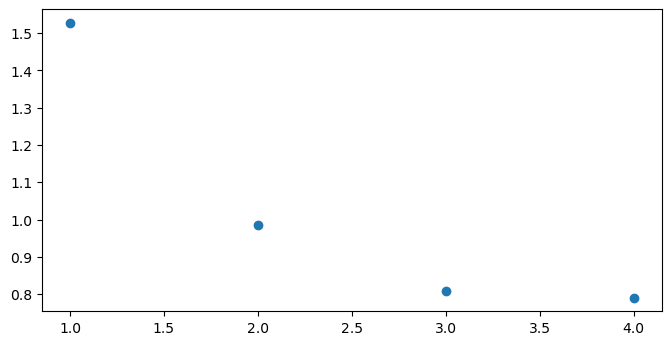

In [95]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,4),dpi=100) 
plt.scatter(range(1,5),RMSE_list)  #原数据散点图
plt.show()